## Download resources

[Click Here](https://drive.google.com/file/d/195YYjTTyi6CUAtrcJ3Yj1U1OV0qdfw18/view?usp=sharing) to download the PPDB vocabulary and put it in a folder named `./models/`.

## Install and Import Libraries

For more details about NLPAUG, visit the following website:

https://neptune.ai/blog/data-augmentation-nlp

https://github.com/makcedward/nlpaug#quick-demo

In [1]:
# ! pip install  --requirement requirements.txt 

In [2]:
# Import all libraries
import pandas as pd; pd.set_option('display.max_columns',None); pd.set_option('display.max_rows',None)
import numpy as np
import gc
import os
import time

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [3]:
## Importing my own packages
from pbt_flow_util import *

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/malickebiele/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/malickebiele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# import nlpaug.augmenter.word as naw
# naw.ContextualWordEmbsAug?
# naw.SynonymAug?
# naw.RandomWordAug?
# naw.BackTranslationAug?

## Load Dataset

In [5]:
df = pd.read_csv("freecode_data.csv")
print(df.shape)
df.head(10)

(46995, 4)


,id,title,question,tag
0,0,GLPI,GLPI (Gestion Libre de Parc Informatique) is a...,Systems-Administration Information-Management ...
1,1,any-dl,any-dl is a generic video downloader tool that...,downloader mediathek Tool generic video-downlo...
2,2,P-rout,P-rout is a tool for collecting and viewing da...,Solar-energy Raspberry-Pi data-logger
3,3,PHP OAuth API,PHP OAuth API authorizes user access using the...,PHP php-classes OAuth
4,4,privacyIDEA,privacyIDEA is a multi-factor authentication s...,Authentication Security OTP two-factor-authent...
5,5,LPAR2RRD,"LPAR2RRD makes historical, future trends and n...",Systems-Administration Operating-Systems Monit...
6,6,lftp,lftp is a sophisticated command line based fil...,Internet FTP http-client SFTP Mirroring Bittor...
7,7,wro4j,wro4j is a project that will help you to easil...,Web resource management Optimization minimization
8,8,QuartzDesk,QuartzDesk is a Java Quartz scheduler manageme...,Quartz-Scheduler management Monitoring Web-App...
9,9,wishlist,Build personal wishlist with family / close fr...,Entertaining


In [6]:
df["tag"].value_counts(dropna=False)[::100]

GPL                                                                                                                                                                                                                                          1390
Archiving                                                                                                                                                                                                                                      52
Software-Development Utilities                                                                                                                                                                                                                 21
Internet Web HTTP-Servers Dynamic-Content                                                                                                                                                                                                      12
Clustering/Distributed-Networks 

### Randomly select and augment a single entry using PBT-flow

In [7]:
random_entry_df = df.sample(1, random_state=RANDOM_SEED)
random_entry_df

,id,title,question,tag
23978,23978,parabola,parabola is a browser-based news feed reader. ...,Internet Web Dynamic-Content News/Diary


In [8]:
%%time
aug_models=initiate_aug_models()

CPU times: user 49.1 s, sys: 6.36 s, total: 55.4 s
Wall time: 1min 10s


In [9]:
%%time
random_entry_df_aug = pbt_flow(
    random_entry_df, 
    aug_models=aug_models, 
    text_col='question', 
    label_col='tag', 
    add_input_data=False 
)
print(random_entry_df_aug.shape)
random_entry_df_aug.sample(5)

(31, 2)
CPU times: user 1min 14s, sys: 3.56 s, total: 1min 18s
Wall time: 1min 23s


,question,tag
27,parabola has a web art - ground newsreels feas...,Internet Web Dynamic-Content News/Diary
9,Is parabola a - browser base news feed lector....,Internet Web Dynamic-Content News/Diary
21,is always bi - browser based apart from pages....,Internet Web Dynamic-Content News/Diary
28,apache parabel is a new browser - hardening ne...,Internet Web Dynamic-Content News/Diary
13,Is parabola a - browser based newsletter feed ...,Internet Web Dynamic-Content News/Diary


In [10]:
print(f"{0} => {random_entry_df.question.values[0]}\n")
# random_entry_df_aug.shape

for idx, text in random_entry_df_aug.question.iteritems():
    print(f"{idx} => {text}\n")

0 => parabola is a browser-based news feed reader. It handles RSS and Atom feeds and supports multiple users. It is written using Ruby on Rails and uses the FeedTools module for all feed parsing.

27 => parabola has a web art - ground newsreels feast lecturer. it supports rss and atom feedingstuffs and has multiple activities. it just executed instructions ruby on rails... resumes the feedtools module for all new activity.

15 => parabola express is browser - based news feed viewer. it handles rss news atom views because supports its users. it is operated using ruby on paper and uses the feedtools methodology for all feed parsing.

23 => image is supported browser - like base news feed lector. it used rss in atom feed which supports multiple users. it is supplied with crimson on rail and uses the latest mental faculty for all feed services.

17 => is parabola a - browser based news feature reader. it handles rss atom and network feeds and comments. users and has downloaded and using on

### Selecting a subset of the dataset 

For the purpose of this demo and to accelerate the process, the tags below are chosen. Any other set of tags could have been chosen or even the entire dataset for a real application.

In [11]:
df = pd.concat(
    [
        df[df["tag"]=="Archiving"],
        df[df["tag"]=="Software-Development Utilities"],
        df[df["tag"]=="Internet Web HTTP-Servers Dynamic-Content"],
        df[df["tag"]=="Clustering/Distributed-Networks Systems-Administration"],
        df[df["tag"]=="Internet Web Dynamic-Content Utilities"],
        df[df["tag"]=="Security Systems-Administration Utilities"],
    ]
).reset_index(drop=True) ; gc.collect()

0

In [12]:
df.head(10)

,id,title,question,tag
0,4526,deco-archive,deco-archive is a collection of extractor wrap...,Archiving
1,4529,deco file extraction framework,"deco is a command-line program that, together ...",Archiving
2,6056,Tardy,The tardy program is a tar(1) post-processor. ...,Archiving
3,6615,renameutils,The file renaming utilities (renameutils for s...,Archiving
4,6633,HylaArchive,HylaArchive is a real time or cron-based archi...,Archiving
5,6744,atool,atool is a script for managing file archives o...,Archiving
6,7498,Cisco Configuration Manager,Cisco Configuration Manager is a set of tools ...,Archiving
7,7596,VVV,VVV (Virtual Volumes View) is an application t...,Archiving
8,9109,Unzix,Unzix is a small command-line program for extr...,Archiving
9,10998,Dalle,Dalle aims to build a set of utilities to work...,Archiving


In [13]:
# clean the text 
df["question"] = df["question"].apply(pre_process)

df.head(10)

,id,title,question,tag
0,4526,deco-archive,deco archive is a collection of extractor wrap...,Archiving
1,4529,deco file extraction framework,deco is a command line program that together w...,Archiving
2,6056,Tardy,the tardy program is a tar post processor it m...,Archiving
3,6615,renameutils,the file renaming utilities renameutils for sh...,Archiving
4,6633,HylaArchive,hylaarchive is a real time or cron based archi...,Archiving
5,6744,atool,atool is a script for managing file archives o...,Archiving
6,7498,Cisco Configuration Manager,cisco configuration manager is a set of tools ...,Archiving
7,7596,VVV,vvv virtual volumes view is an application tha...,Archiving
8,9109,Unzix,unzix is a small command line program for extr...,Archiving
9,10998,Dalle,dalle aims to build a set of utilities to work...,Archiving


### Distribution of the number of entries per label - before data augmentation

<AxesSubplot:>

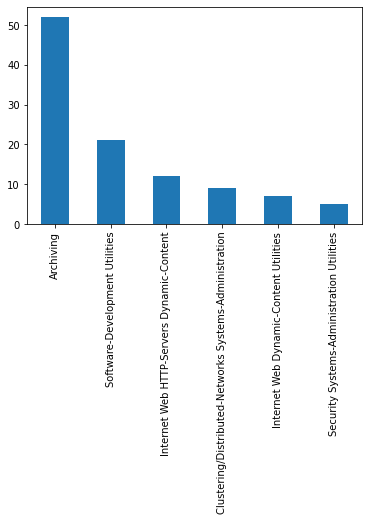

In [14]:
df["tag"].value_counts(dropna=False).plot(kind="bar")

### Data augmentation


In [15]:
%%time
filename='augmented train data.csv' 

if not os.path.exists(os.path.join(".", filename)):
    augment_data_and_save_to_file(
        df["question"].values, 
        df["tag"].values, 
        text_col="question", 
        label_col="tag", 
        filename=filename, 
        path_root=".", 
        use_oversampling=True, 
        majority_class_factor=1
    )
    

Label 1/6 processed
Label 2/6 processed
Label 3/6 processed
Label 4/6 processed
Label 5/6 processed
Label 6/6 processed

Check for duplicated entries 
Before (310, 2)
After (309, 2)
CPU times: user 14min 25s, sys: 1min 8s, total: 15min 34s
Wall time: 37min 55s


In [16]:
df_aug = pd.read_csv(os.path.join(".", filename))
print(df_aug.shape)
df_aug.sample(10)

(309, 2)


,question,tag
66,easypass pl is a short scripting that can be u...,Security Systems-Administration Utilities
95,Key Cluster is a high-availability ha system f...,Clustering/Distributed-Networks Systems-Admini...
233,mod trace output is an apache module that desi...,Internet Web HTTP-Servers Dynamic-Content
273,taktuk is a parallel and scalable remote execu...,Clustering/Distributed-Networks Systems-Admini...
153,easypass pl is a short script that can be used...,Security Systems-Administration Utilities
200,veritar veri fy tar is a command line utility ...,Archiving
307,the ak website dyn designer is a tool for crea...,Internet Web Dynamic-Content Utilities
262,gui apt key is a graphical front end to the ap...,Security Systems-Administration Utilities
187,mp cd mysql is an mp cd indexing program which...,Internet Web Dynamic-Content Utilities
134,the goal of the apache tomcat project is to pr...,Internet Web HTTP-Servers Dynamic-Content


In [17]:
df_aug = df_aug.dropna().drop_duplicates().reset_index(drop=True)
print(df_aug.shape)
df_aug.sample(10)

(309, 2)


,question,tag
60,phpserials is web a based - PHP application fo...,Internet Web Dynamic-Content Utilities
101,ctl is a cross-platform control dispatching to...,Clustering/Distributed-Networks Systems-Admini...
240,apt gui is key graphical frontend a to the apt...,Security Systems-Administration Utilities
247,pstreams allows you to run another program fro...,Software-Development Utilities
15,The program allows a client to execute scripts...,Security Systems-Administration Utilities
279,Clusterit is a software pack that compensates ...,Clustering/Distributed-Networks Systems-Admini...
176,nius allows reservation of linux and unix node...,Clustering/Distributed-Networks Systems-Admini...
49,taktuk a is parallel and scalable remote imple...,Clustering/Distributed-Networks Systems-Admini...
173,conteg is a class php to negotiate the current...,Internet Web HTTP-Servers Dynamic-Content
286,suid wrapper is a wrapper program for executin...,Security Systems-Administration Utilities


### Distribution of the number of entries per label - after data augmentation

<AxesSubplot:>

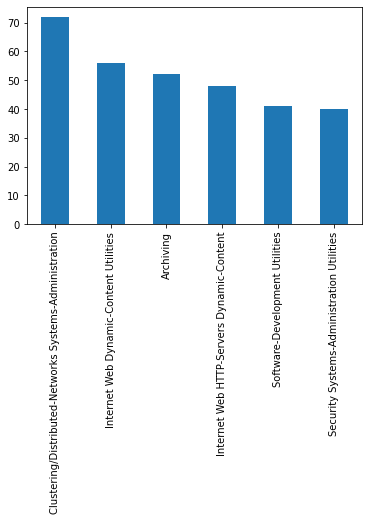

In [18]:
df_aug["tag"].value_counts(dropna=False).plot(kind="bar")